## **menganalisis distribusi "thumbsUpCount" pada dataset startup Indonesia.**

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# **Masukkan Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigData & Data Maining Sem 5/UAS/startup_indonesia.csv')

print(data.head())
print(data.info())

   id        created_at  score  \
0   0  2024-10-26 20:44      2   
1   1  2024-10-11 10:18      1   
2   2  2024-10-07 00:49      5   
3   3  2024-10-24 20:31      1   
4   4  2024-10-26 07:23      1   

                                             content  thumbsUpCount  
0  udah lama dapet Paylater.. lalu tiba2 di bulan...              0  
1  Kenapa susah banget menambahkan alamat. Teruta...             25  
2  Sudah beberapa bulan tidak bisa mencari barang...              0  
3  Tolong kepada pihak bulakapak semoga kedepanny...              1  
4  "HIDUP SEGAN MATIPUN TAK MAU", Itulah kata2 yg...              3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90147 entries, 0 to 90146
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             90147 non-null  int64 
 1   created_at     90147 non-null  object
 2   score          90147 non-null  int64 
 3   content        90147 non-null  object
 4   thum

# **Visualisasi Dataset Dalam Bentuk Tabel**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigData & Data Maining Sem 5/UAS/startup_indonesia.csv')
data

,id,created_at,score,content,thumbsUpCount
0,0,2024-10-26 20:44,2,udah lama dapet Paylater.. lalu tiba2 di bulan...,0
1,1,2024-10-11 10:18,1,Kenapa susah banget menambahkan alamat. Teruta...,25
2,2,2024-10-07 00:49,5,Sudah beberapa bulan tidak bisa mencari barang...,0
3,3,2024-10-24 20:31,1,Tolong kepada pihak bulakapak semoga kedepanny...,1
4,4,2024-10-26 07:23,1,"""HIDUP SEGAN MATIPUN TAK MAU"", Itulah kata2 yg...",3
...,...,...,...,...,...
90142,90142,2022-01-15 09:31,4,"Permisi,,,ada yang mencoba masuk aplikasi buka...",0
90143,90143,2022-02-08 12:29,1,"Setiap ada masalah atau komplain, selalu pembe...",0
90144,90144,2020-09-25 00:44,5,Perkenalkan nama saya ahmad gufron saya sudah ...,0
90145,90145,2020-09-20 20:08,5,Assalamualaikum nama saya SYAHRUL HUSYIIN ASNA...,0


# **Pre-Processing**

In [ ]:
def preprocess_data(data):

    data = data.dropna()


    for col in data.columns:
        if pd.api.types.is_string_dtype(data[col]):
            try:
                data[col] = pd.to_datetime(data[col], errors='coerce')
            except Exception:
                pass

    datetime_cols = data.select_dtypes(include=['datetime64']).columns
    for col in datetime_cols:
        data[col] = data[col].map(lambda x: x.timestamp() if pd.notnull(x) else None)


    categorical_cols = data.select_dtypes(include=['object']).columns
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
    data[numerical_cols] = (data[numerical_cols] - data[numerical_cols].mean()) / data[numerical_cols].std()

    return data

processed_data = preprocess_data(data)

print(processed_data.dtypes)
print(processed_data.head())


<ipython-input-112-302742dc02bd>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce')


id               float64
created_at       float64
score            float64
thumbsUpCount    float64
dtype: object
         id  created_at     score  thumbsUpCount
0 -1.732022    3.530787 -1.112179      -0.088796
1 -1.731984    3.495353 -1.712867       1.026885
2 -1.731945    3.485263  0.689885      -0.088796
3 -1.731907    3.526175 -1.712867      -0.044169
4 -1.731868    3.529510 -1.712867       0.045086


# **Visualisasi Pre-Processing**

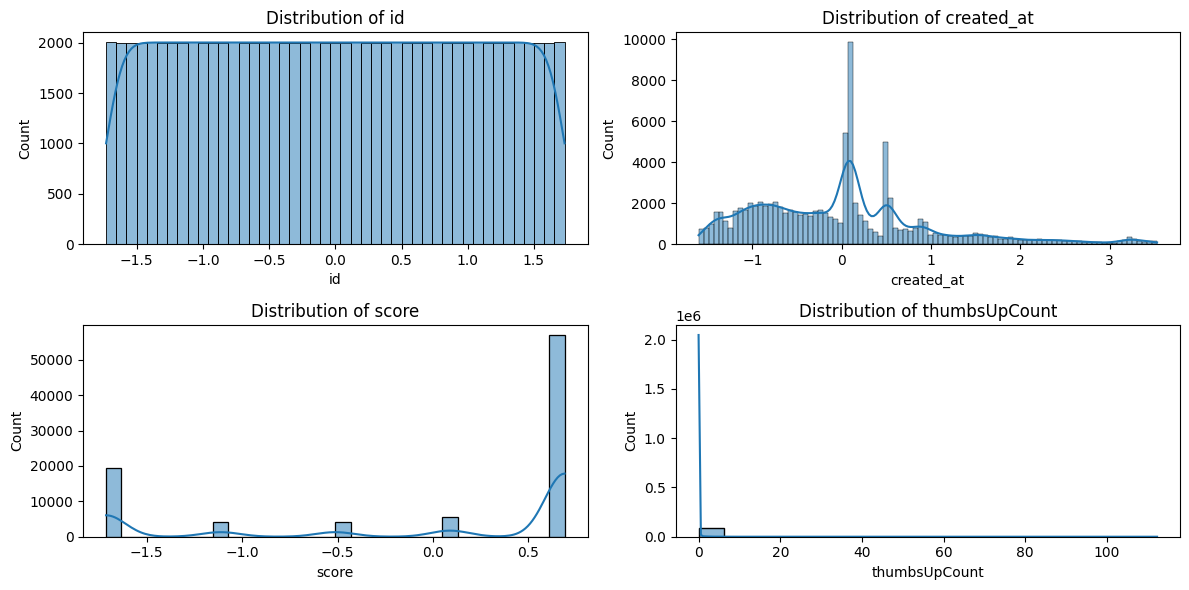

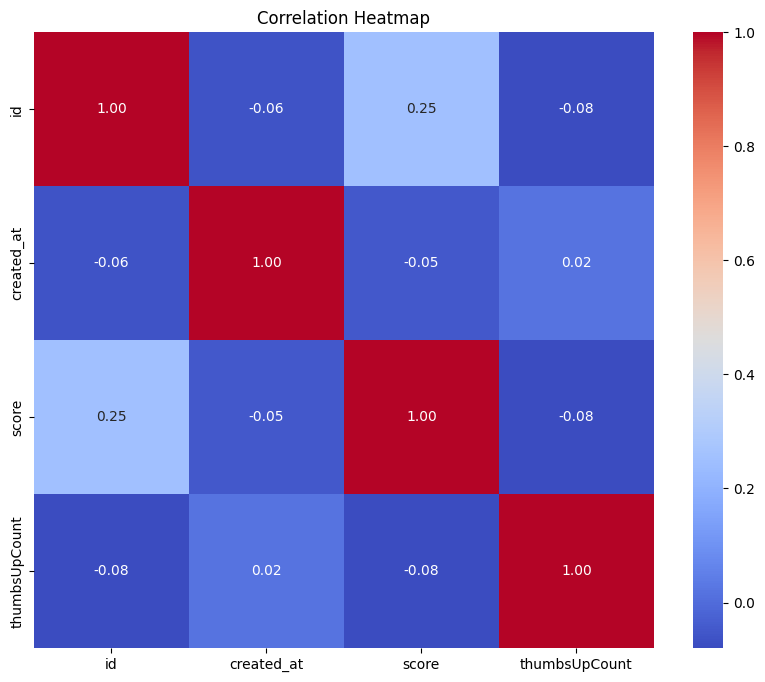

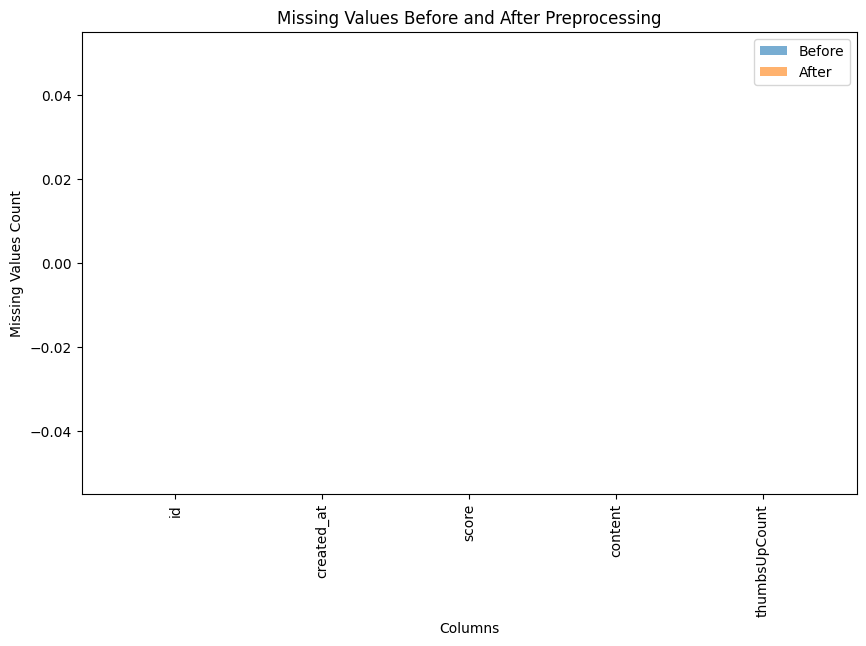

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = processed_data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, len(numerical_cols) // 2, i)
    sns.histplot(processed_data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(processed_data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

missing_before = data.isnull().sum()
missing_after = processed_data.isnull().sum()

plt.figure(figsize=(10, 6))
plt.bar(missing_before.index, missing_before.values, alpha=0.6, label='Before')
plt.bar(missing_after.index, missing_after.values, alpha=0.6, label='After')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Before and After Preprocessing')
plt.legend()
plt.show()


# **Exploratory Data Analysis**

Descriptive Statistics:
                 id    created_at         score  thumbsUpCount
count  9.014700e+04  9.014700e+04  9.014700e+04   9.014700e+04
mean   3.743972e-17  1.870597e-15  4.902386e-17   2.118300e-17
std    1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00
min   -1.732022e+00 -1.603059e+00 -1.712867e+00  -8.879605e-02
25%   -8.660110e-01 -7.634349e-01 -1.112179e+00  -8.879605e-02
50%    0.000000e+00  4.797913e-02  6.898846e-01  -8.879605e-02
75%    8.660110e-01  4.885035e-01  6.898846e-01  -8.879605e-02
max    1.732022e+00  3.532224e+00  6.898846e-01   1.123718e+02


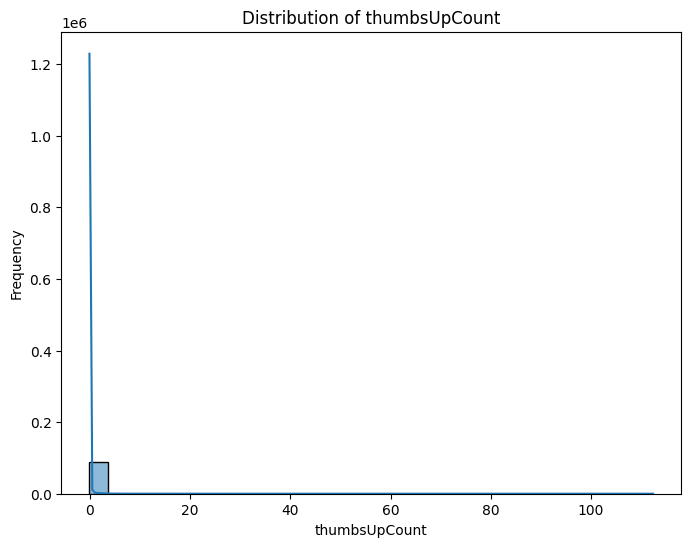

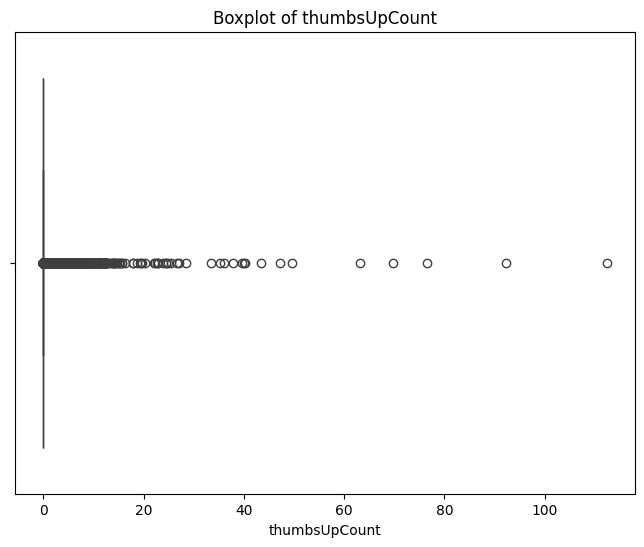

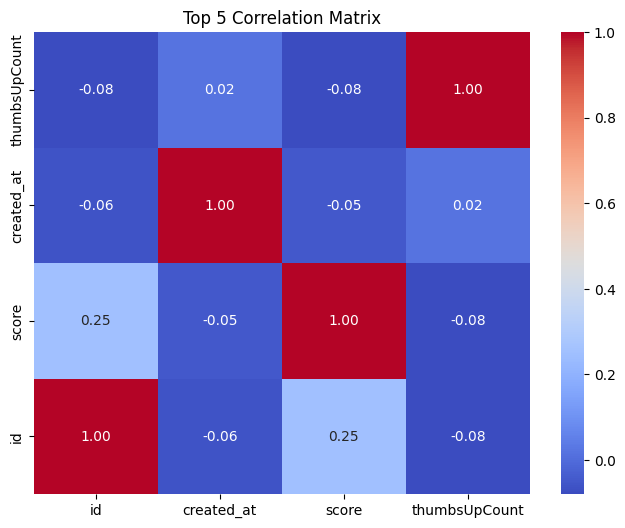

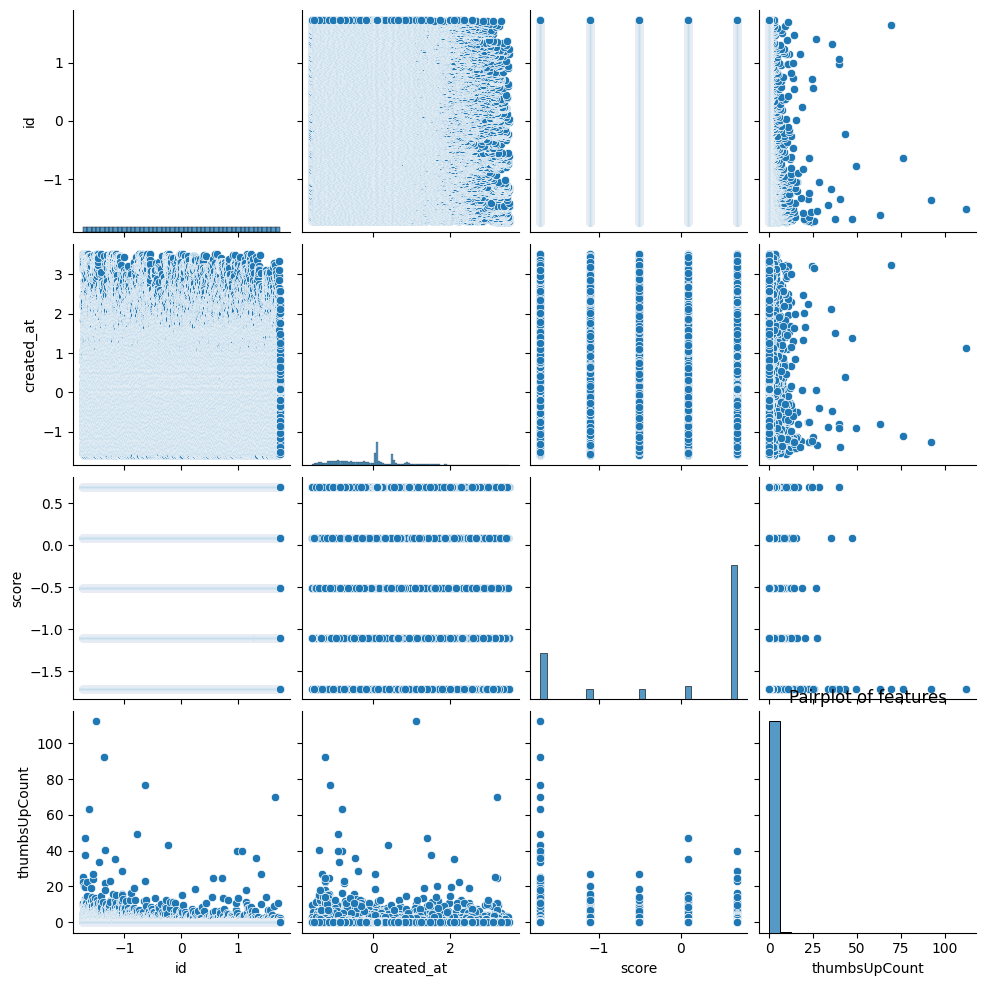

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Descriptive Statistics:")
print(processed_data.describe())

plt.figure(figsize=(8, 6))
sns.histplot(processed_data['thumbsUpCount'], kde=True, bins=30)
plt.title('Distribution of thumbsUpCount')
plt.xlabel('thumbsUpCount')
plt.ylabel('Frequency')
plt.show()

corr_matrix = processed_data.corr().nlargest(5, 'thumbsUpCount')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 5 Correlation Matrix')
plt.show()

sns.pairplot(processed_data)
plt.title('Pairplot of features')
plt.show()

# **Feature Selection**

In [ ]:
X = processed_data.drop('thumbsUpCount', axis=1)
y = processed_data['thumbsUpCount']

selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['id', 'created_at', 'score'], dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:779: UserWarning: k=10 is greater than n_features=3. All the features will be returned.
  warnings.warn(


# **Visualisasi Feature Selection**

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:779: UserWarning: k=10 is greater than n_features=3. All the features will be returned.
  warnings.warn(


Selected Features: Index(['id', 'created_at', 'score'], dtype='object')


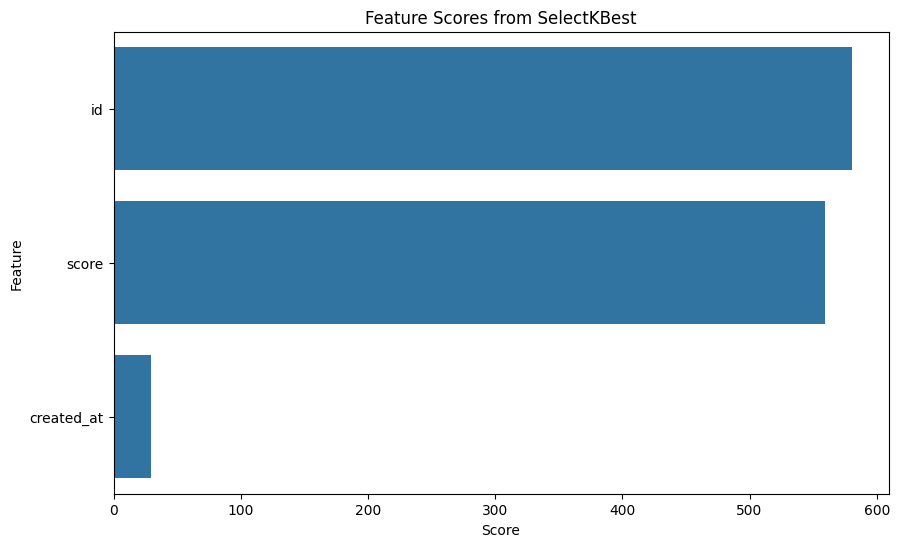

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

X = processed_data.drop('thumbsUpCount', axis=1)
y = processed_data['thumbsUpCount']

selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Scores from SelectKBest')
plt.show()

# **Modeling with Random Forest And XGBoost**

In [ ]:
`

Random Forest MSE: 0.7668320569518886
XGBoost MSE: 0.7990408978845143


# **Visualisasi Modeling with Random Forest And XGBoost**

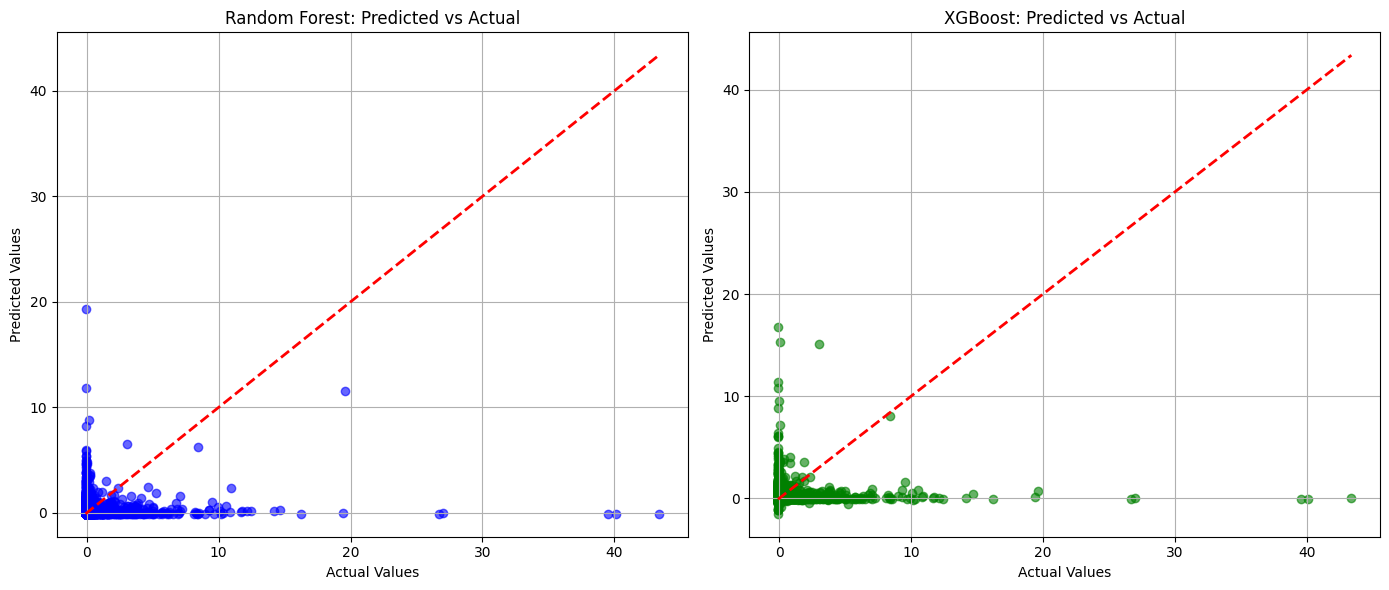

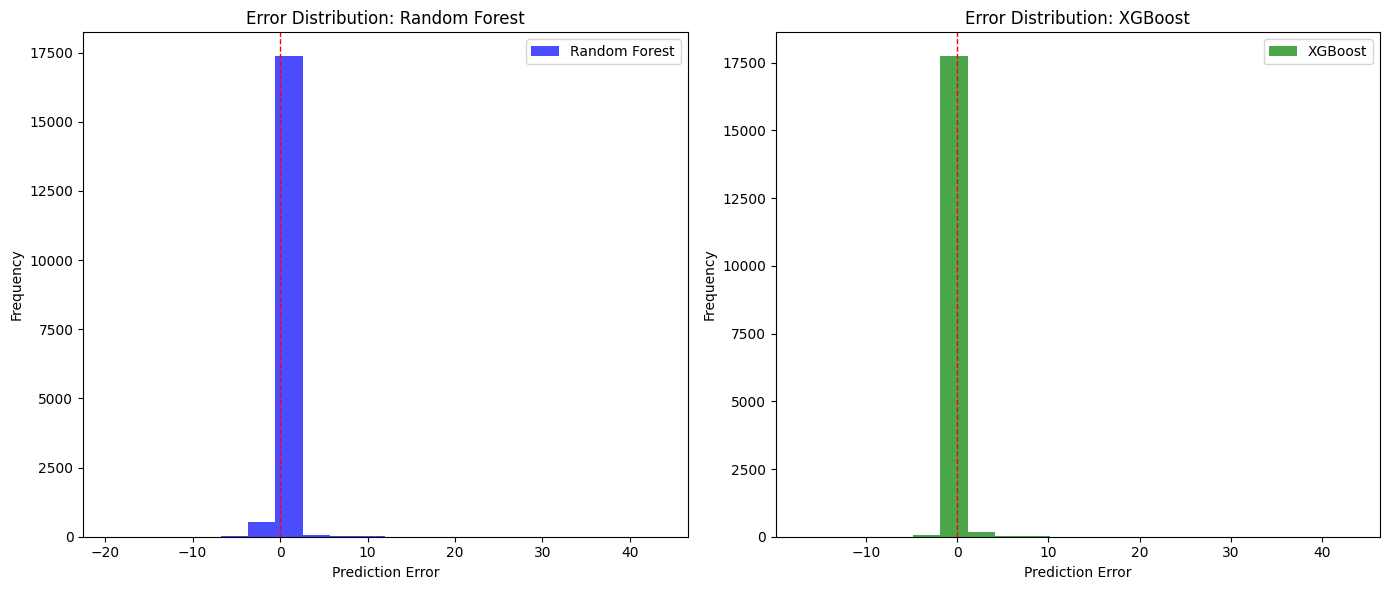

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_predictions, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('XGBoost: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()

rf_errors = y_test - rf_predictions
xgb_errors = y_test - xgb_predictions

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(rf_errors, bins=20, color='blue', alpha=0.7, label='Random Forest')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)
plt.title('Error Distribution: Random Forest')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(xgb_errors, bins=20, color='green', alpha=0.7, label='XGBoost')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)
plt.title('Error Distribution: XGBoost')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


# **Model Evaluation**

Random Forest - Mean Squared Error: 0.7668320569518886
Random Forest - R-squared: -0.08588703100155248
XGBoost - Mean Squared Error: 0.7990408978845143
XGBoost - R-squared: -0.13149696910371578


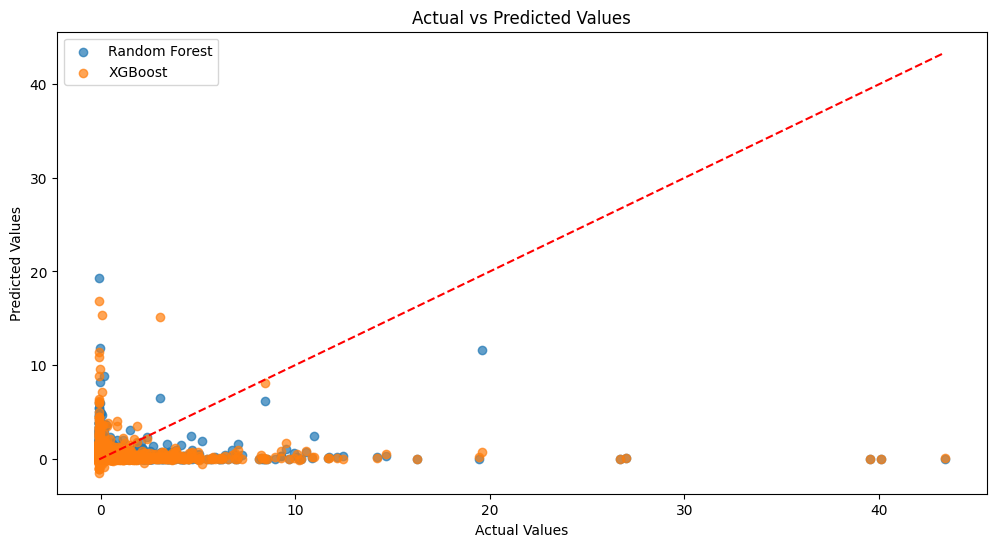

In [ ]:
from sklearn.metrics import r2_score

rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R-squared:", rf_r2)

dtest = xgb.DMatrix(X_test)
xgb_pred = xgb_model.predict(dtest)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print("XGBoost - Mean Squared Error:", xgb_mse)
print("XGBoost - R-squared:", xgb_r2)

plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_pred, alpha=0.7, label='Random Forest')
plt.scatter(y_test, xgb_pred, alpha=0.7, label='XGBoost')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# **Save Models**

In [ ]:
import joblib

joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')


['xgboost_model.pkl']